# Quantum Model learning

In [1]:
%matplotlib inline
import qinfer as qi
# import qutip as qt
import numpy as np
import scipy as sp
import math as mth
from IPython.display import display, Math, Latex
from functools import partial
import matplotlib.pyplot as plt

/Users/raf/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import datetime
import os as os
import time as time

In [3]:
import importlib as imp

In [4]:
import logging as logging
import warnings as warnings
import sys

%run LoggingCode.py

Importing Local Function for Hamiltonian learning

In [5]:
# Add personalized library to PYTHONPATH
sys.path.append(os.path.join("..","Libraries","QML_lib"))

In [6]:
from Norms import *
from IOfuncts import *
from EvalLoss import *

import ProbeStates as pros
import multiPGH as mpgh
import GenSimQMD_IQLE as gsi
import Evo as evo

In [7]:
""" filter only the Weight Clipping warning """
#SET LEVEL WARNINGS TO 0 In FINAL VERSION
warnings.filterwarnings("ignore", message='Negative weights occured', category=RuntimeWarning)

# Model learning functions


In [8]:

#List of opearators generating the Hamiltoninans

lst = [evo.sigmax(),evo.sigmay(), evo.sigmaz()]     

In [9]:
import Utils as uti
import Models as mods
import BayesF as bayf
import ModLearn as mdl
import QMD as qmd
import QML as qml

## Reload when needed

In [14]:
imp.reload(pros)
imp.reload(mpgh)
imp.reload(gsi)
imp.reload(evo)
imp.reload(mdl)
imp.reload(uti)
imp.reload(mods)
imp.reload(bayf)
imp.reload(qmd)
imp.reload(qml)

<module 'QML' from '..\\Libraries\\QML_lib\\QML.py'>

# MODEL LEARNING TEST

In [10]:
modeltest = qmd.ModelsDevelopmentClass()

print(modeltest.TrueOpList)
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

[[[ 1.+0.j  0.+0.j]
  [ 0.+0.j -1.+0.j]]]
['sz_']


In [18]:
#modeltest.ModsOpList

In [11]:
print('ModelNames: ' + repr(modeltest.ModelNames))
#print('ModelDict: ' + repr(modeltest.ModelDict))

ModelNames: ['sx_', 'sy_', 'sz_', 'sx_sy_', 'sx_sz_', 'sy_sz_', 'sx_sy_sz_']


In [12]:
modeltest.InitialiseAllActiveModels()

[[ 0.82562251]]
Initialization Ready
[[ 0.4084283]]
Initialization Ready
[[ 0.48829279]]
Initialization Ready


In [13]:
modeltest.TrueParamsList

array([[ 0.44525646]])

In [15]:
start=time.clock()
modeltest.UpdateAllActiveModels(expnum=500)
end=time.clock()
print('Total elapsed time: ' + str(end-start))


Initial time selected > 947.460962843


/Users/raf/Anaconda/anaconda/lib/python2.7/site-packages/qinfer/smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.40879895881). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


Final time selected > 167.171645215
Exiting learning for Reaching Cov. Norm. Thrshold of 8.14740346078e-07
 at Iteration Number 291
Final Parameters mean and stdev:[ 0.80778804  0.00217004]
Batch single time 0 elapsed time: 63.979
Initial time selected > 30.9805989288


/Users/raf/Anaconda/anaconda/lib/python2.7/site-packages/qinfer/smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.48664220173). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


Final time selected > 772.703667652
Exiting learning for Reaching Cov. Norm. Thrshold of 9.48426580296e-07
 at Iteration Number 159
Final Parameters mean and stdev:[-0.05850107  0.00097387]
Batch single time 1 elapsed time: 34.059681
Initial time selected > 18.4984800324


/Users/raf/Anaconda/anaconda/lib/python2.7/site-packages/qinfer/smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.73729956388). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


Final time selected > 221.811745089
Exiting learning for Reaching Cov. Norm. Thrshold of 5.95707330853e-07
 at Iteration Number 107
Final Parameters mean and stdev:[ 0.44647933  0.00144979]
Batch single time 2 elapsed time: 39.949858
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time: 167.475682


In [16]:
for i in range(len(modeltest.ModelsList)):
    print(modeltest.ModelsList[i].NewEval)

[ 0.80672915]
[-0.05850107]
[ 0.445731]


In [17]:
modeltest.ComputeAllBayesFactors()

{"['sx_']VS['sy_']": 0.0,
 "['sx_']VS['sz_']": 0.0,
 "['sy_']VS['sx_']": 9.7658915047817871e+35,
 "['sy_']VS['sz_']": 0.0,
 "['sz_']VS['sx_']": 2.1925207524242464e+70,
 "['sz_']VS['sy_']": 2.2450799820484354e+34}

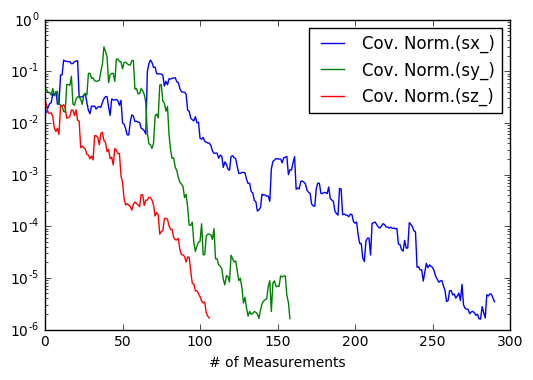

In [19]:


#Plot Covariance Matrix. 
for i in range(len(modeltest.ModelsList)):
    plt.semilogy(modeltest.ModelsList[i].Covars, label='Cov. Norm.('+str(modeltest.ModelNames[i])+')')
plt.legend()
plt.xlabel('# of Measurements')





In [30]:
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

['sx_']


In [31]:
tpool = modeltest.DataPool(20)

In [32]:
modeltest.UpdateAllLogLikelihoods(tpool)

LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.752945249722707). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9131972212853925). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4528867137039372). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8082909550946167). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


In [33]:
modeltest.ComputeAllBayesFactors(fromLogL = True)

{"['sx_']VS['sx_sy_']": 3.2904721885472413e+84,
 "['sx_']VS['sy_']": 3.4397133939597899e+35,
 "['sx_']VS['sz_']": 2.7678165852015967e+43,
 "['sx_']VS['sz_sx_']": 1.280510537376759e+63,
 "['sx_']VS['sz_sy_']": 1.9707159097095937e+59,
 "['sx_sy_']VS['sx_']": 0.0,
 "['sx_sy_']VS['sy_']": 0.0,
 "['sx_sy_']VS['sz_']": 0.0,
 "['sx_sy_']VS['sz_sx_']": 0.0,
 "['sx_sy_']VS['sz_sy_']": 0.0,
 "['sy_']VS['sx_']": 0.0,
 "['sy_']VS['sx_sy_']": 9.566123137832882e+48,
 "['sy_']VS['sz_']": 80466488.576110482,
 "['sy_']VS['sz_sx_']": 3.7227245142730871e+27,
 "['sy_']VS['sz_sy_']": 5.7293026598384997e+23,
 "['sz_']VS['sx_']": 0.0,
 "['sz_']VS['sx_sy_']": 1.1888331785205981e+41,
 "['sz_']VS['sy_']": 1.2427533668812885e-08,
 "['sz_']VS['sz_sx_']": 4.6264284426328482e+19,
 "['sz_']VS['sz_sy_']": 7120110198942444.0,
 "['sz_sx_']VS['sx_']": 0.0,
 "['sz_sx_']VS['sx_sy_']": 2.5696564709948187e+21,
 "['sz_sx_']VS['sy_']": 0.0,
 "['sz_sx_']VS['sz_']": 0.0,
 "['sz_sx_']VS['sz_sy_']": 0.00015390079598620598,
 "['sz

## Preliminary trials

In [27]:
tpool = modeltest.DataPool(10)

In [33]:
idMod=3

mymodel = modeltest.ModelsList[idMod]

mytpool = np.empty(0)
for j in range( len(tpool) ):
    if idMod is not j:
        mytpool=np.append(mytpool, tpool[j])
print('mytpool len: ', len(mytpool))
mytpool

mytpool len:  60


array([  3.56836995e-01,   1.58083401e+00,   1.09448136e+00,
         1.86424750e+00,   3.57263671e-01,   1.42073129e+00,
         5.29827653e-01,   1.20131291e+00,   8.55761623e-01,
         1.72847692e+00,   2.64867230e+02,   3.19450833e+02,
         1.13337158e+03,   1.54666241e+02,   1.31289569e+03,
         9.10214242e+02,   4.02381052e+02,   8.83574274e+02,
         7.75353685e+03,   2.84264037e+03,   1.71698284e+02,
         6.53238557e+01,   2.73964323e+02,   6.66713766e+02,
         1.76138709e+02,   3.66000634e+02,   1.15482096e+03,
         3.45467819e+03,   3.95268035e+04,   7.40191641e+02,
         7.33844757e+01,   2.16545898e+02,   4.49400050e+01,
         7.63788501e+01,   3.16963256e+02,   3.33724672e+01,
         5.26799673e+01,   5.25487900e+01,   4.91751693e+02,
         8.48642342e+01,   1.73361067e+02,   6.74491520e+02,
         2.16729790e+02,   2.99624902e+02,   7.71997715e+02,
         3.02992719e+02,   2.51454786e+02,   6.19146652e+02,
         8.39861351e+02,

In [34]:
"""This can be adopted alternatively to sample the frequencies"""
#myexperiments = np.array(list(map(lambda x: Kmodel.Heuristic(), range(len(tpool))) ) )

myexperiments = np.empty((len(mytpool), ), dtype=mymodel.GenSimModel.expparams_dtype)       #initialises the experiments to perform for the update

myexperiments['t']  = mytpool

In [35]:
myexperiments

array([(0.35683699543121394, 9.46765942e-315, 6.917e-321),
       (1.5808340135250298, 0.6154953177229143, 0.0),
       (1.0944813590553506, 8.60973318409419e-67, 9.462515493683218e-96),
       (1.864247502033219, 5.937421302973274e-38, 5.981490944369225e-154),
       (0.3572636712171276, 7.128903417486503e-67, 2.2137974609192766e-52),
       (1.4207312855098175, 3.221777067163919e-57, 2.440043148419846e-154),
       (0.5298276533358683, 1.7973950845951164e-52, 1.6584870046017555e-76),
       (1.2013129096038775, 4.0139765785239013e-57, 1.1447266613021176e-259),
       (0.8557616232532389, 8.238801249426261e-67, 8.232977426101218e-67),
       (1.728476919127297, 3.507440597248618e-33, 5.90255903737772e-96),
       (264.86723025964, 4.6569859217993704e-33, 1.0860392870200448e-42),
       (319.45083288907455, 8.230073927580902e-67, 3.856824477342548e-110),
       (1133.3715763774308, 1.0289754681224096e-71, 2.175299784204236e-76),
       (154.66624113126255, 8.230073927580902e-67, 3.8568

In [ ]:
myexperiments[field_i]

In [43]:
inv_field = [item[0] for item in mymodel.GenSimModel.expparams_dtype[1:] ]
print('inv_field: ', inv_field)
for i in range(len(inv_field)):
    myexperiments[inv_field[i]] = mymodel.NewEval[i]
print(myexperiments)

inv_field:  ['w_1', 'w_2']
[(0.35683699543121394, 0.4867189654629474, 0.728015489734225)
 (1.5808340135250298, 0.4867189654629474, 0.728015489734225)
 (1.0944813590553506, 0.4867189654629474, 0.728015489734225)
 (1.864247502033219, 0.4867189654629474, 0.728015489734225)
 (0.3572636712171276, 0.4867189654629474, 0.728015489734225)
 (1.4207312855098175, 0.4867189654629474, 0.728015489734225)
 (0.5298276533358683, 0.4867189654629474, 0.728015489734225)
 (1.2013129096038775, 0.4867189654629474, 0.728015489734225)
 (0.8557616232532389, 0.4867189654629474, 0.728015489734225)
 (1.728476919127297, 0.4867189654629474, 0.728015489734225)
 (264.86723025964, 0.4867189654629474, 0.728015489734225)
 (319.45083288907455, 0.4867189654629474, 0.728015489734225)
 (1133.3715763774308, 0.4867189654629474, 0.728015489734225)
 (154.66624113126255, 0.4867189654629474, 0.728015489734225)
 (1312.8956920887006, 0.4867189654629474, 0.728015489734225)
 (910.2142421090025, 0.4867189654629474, 0.728015489734225)
 (

In [47]:
mysimparams = mymodel.SimParams

mydata = mymodel.GenSimModel.simulate_experiment(mymodel.SimParams, myexperiments)[0][0]

Kupdater=mymodel.Updater
Kupdater.batch_update(mydata, myexperiments, resample_interval=100)

LogLikelihood = np.sum(Kupdater.log_total_likelihood)

# MULTIPLE testing running

In [10]:
nruns = 100
pool_len = 50

collectTrueOpList = []
collectTrueNames = []
collectTrueParams = []

collectEstimParams = []

collectKfactorsDict = []
collectLogL = []


for run in range(nruns):
    modeltest = qmd.ModelsDevelopmentClass(7, lst)
    collectTrueOpList.append(modeltest.TrueOpList)
    collectTrueNames.append(modeltest.TrueNames)
    
    modeltest.InitiliaseAllModels()
    
    collectTrueParams.append(modeltest.TrueParamsList)
    
    start=time.clock()
    modeltest.UpdateAllModels(expnum=350)
    end=time.clock()
    print('Total elapsed time for the learning process: ' + str(end-start))
    
    
    collectEstimParams.append([modeltest.ModelsList[i].NewEval for i in range(len(modeltest.ModelsList)) ])
    
    tpool = modeltest.DataPool(pool_len)
    
    start=time.clock()
    modeltest.UpdateAllLogLikelihoods(tpool)
    end=time.clock()
    print('Total elapsed time for Bayes factor update: ' + str(end-start))
    
    collectKfactorsDict.append(modeltest.ComputeAllBayesFactors(fromLogL = True))
    
    collectLogL.append([modeltest.ModelsList[i].KLogTotLikelihood for i in range(len(modeltest.ModelsList)) ])
    

[[ 0.5860098]]
Initialization Ready
[[ 0.15836811]]
Initialization Ready
[[ 0.4279087]]
Initialization Ready
[[ 0.15672626  0.97625095]]
Initialization Ready
[[ 0.46922643  0.24787462]]
Initialization Ready
[[ 0.6439683   0.20564304]]
Initialization Ready
[[ 0.63293011  0.85017443  0.10804446]]
Initialization Ready
Initial time selected > 1.29106627735
Final time selected > 1.40759000391
Final Parameters mean and stdev:[-0.01985354  0.51262223]
True model was: [[[ 0.+0.j  1.+0.j]
  [ 1.+0.j  0.+0.j]]

 [[ 0.+0.j -0.-1.j]
  [ 0.+1.j  0.+0.j]]

 [[ 1.+0.j  0.+0.j]
  [ 0.+0.j -1.+0.j]]]
True parameters were: [[ 0.43405429  0.77906936  0.83532925]]
Single iteration 0 elapsed time: 52.20132462257923
Initial time selected > 6.72291585205
Final time selected > 1284.91366825
Exiting learning for Reaching Cov. Norm. Thrshold of 4.24891691164e-07
 at Iteration Number 188
Final Parameters mean and stdev:[  1.67007387e+00   6.51837166e-04]
True model was: [[[ 0.+0.j  1.+0.j]
  [ 1.+0.j  0.+0.j]]



KeyboardInterrupt: 

In [25]:
modeltest = qmd.ModelsDevelopmentClass(7, lst)
modeltest.TrueParamsList

array([[ 0.50250749]])

## Data export

In [ ]:
import pickle
PIK = "testQMD_pool"+str(pool_len)+".dat"

In [514]:
data = [collectTrueOpList, collectTrueNames, collectTrueParams, collectEstimParams, collectKfactorsDict, collectLogL]
with open(PIK, "wb") as f:
    pickle.dump(data, f)

## Data import

In [728]:
import pickle
pool_len = 20
PIK = "testQMD_pool"+str(pool_len)+".dat"

with open(PIK, "rb") as f:
    dataold = pickle.load(f)

## Step-by-step checking

In [413]:
print('ModelNames: ' + repr(modeltest.ModelNames))

ModelNames: ['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']


In [414]:
ids = 99
print("True model: " + repr(collectTrueNames[ids][0]))

True model: 'sz_sx_'


In [409]:
print("Best model found: " + repr(modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))]) )

Best model found: 'sy_sz_'


In [353]:
collectTrueParams[ids]

array([[ 0.63612677,  0.41478088]])

In [163]:
evo.getH(collectTrueParams[ids], collectTrueOpList[ids])

array([[ 0.18774291+0.j        ,  0.00000000-0.46414783j],
       [ 0.00000000+0.46414783j, -0.18774291+0.j        ]])

In [203]:
collectLogL[ids]

[-356.34959552749945,
 -309.98335005268302,
 -329.44589238992444,
 -371.01231960058362,
 -266.04046756817871,
 -109.89148827249306,
 -304.02204699679373]

In [165]:
collectKfactorsDict[ids]

{"['sx_']VS['sy_']": 2.466545003709314e+50,
 "['sx_']VS['sy_sx_']": 0.0,
 "['sx_']VS['sy_sz_']": 1.1102230246251565e-16,
 "['sx_']VS['sy_sz_sx_']": 1.2325626075337937e-09,
 "['sx_']VS['sz_']": 1437094397674.96,
 "['sx_']VS['sz_sx_']": 1.0136122796027082e+43,
 "['sy_']VS['sx_']": 0.0,
 "['sy_']VS['sy_sx_']": 0.0,
 "['sy_']VS['sy_sz_']": 0.0,
 "['sy_']VS['sy_sz_sx_']": 0.0,
 "['sy_']VS['sz_']": 0.0,
 "['sy_']VS['sz_sx_']": 4.1094416647347032e-08,
 "['sy_sx_']VS['sx_']": 8.2851831811340211e+37,
 "['sy_sx_']VS['sy_']": 2.0435777180242562e+88,
 "['sy_sx_']VS['sy_sz_']": 9.5849849787552692e+21,
 "['sy_sx_']VS['sy_sz_sx_']": 1.021200708430138e+29,
 "['sy_sx_']VS['sz_']": 1.1906590333318505e+50,
 "['sy_sx_']VS['sz_sx_']": 8.3979634111552724e+80,
 "['sy_sz_']VS['sx_']": 8643918795384441.0,
 "['sy_sz_']VS['sy_']": 2.1320614717224526e+66,
 "['sy_sz_']VS['sy_sx_']": 0.0,
 "['sy_sz_']VS['sy_sz_sx_']": 10654171.192689272,
 "['sy_sz_']VS['sz_']": 1.2422127274804269e+28,
 "['sy_sz_']VS['sz_sx_']": 8.7

### applying directly the champion rule as the highest BayesFactor

In [417]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]==modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))])
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 64.0% of cases


### tournament rule among Bayes Factors

In [610]:
prolst=np.arange(len(modeltest.ModsOpList))

prooutlst = np.empty(0)
for i in range(len(prolst)):
    for j in range(len(prolst)):
        if i is not j:
            prooutlst = np.append(prooutlst, np.array([prolst[i],prolst[j]]) )
prooutlst

array([ 0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  1.,
        0.,  1.,  2.,  1.,  3.,  1.,  4.,  1.,  5.,  1.,  6.,  2.,  0.,
        2.,  1.,  2.,  3.,  2.,  4.,  2.,  5.,  2.,  6.,  3.,  0.,  3.,
        1.,  3.,  2.,  3.,  4.,  3.,  5.,  3.,  6.,  4.,  0.,  4.,  1.,
        4.,  2.,  4.,  3.,  4.,  5.,  4.,  6.,  5.,  0.,  5.,  1.,  5.,
        2.,  5.,  3.,  5.,  4.,  5.,  6.,  6.,  0.,  6.,  1.,  6.,  2.,
        6.,  3.,  6.,  4.,  6.,  5.])

In [611]:
modelNames = modeltest.ModelNames
modelNames

['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']

In [642]:
threshold = 1

def findWinners(modelNames, proBayesFactorsList):
    proBayesFactorNames=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorNames.append("")
        if proBayesFactorsList[i] > threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i])])
        elif proBayesFactorsList[i] < 1/threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i+1])])
            
    return(proBayesFactorNames)

In [643]:
def ChampbyTourn(modelNames, collectLogL_single):
    proBayesFactorsList=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorsList.append(bayf.BayesFactorfromLogL(collectLogL_single[int(prooutlst[2*i])], collectLogL_single[int(prooutlst[2*i+1])] ))
    
    proBayesFactorNames = findWinners(modelNames, proBayesFactorsList)
    
    wincount = np.array(list((map(lambda testmodel: proBayesFactorNames.count(testmodel),  modeltest.ModelNames))))
    winner = modeltest.ModelNames[np.argmax(wincount)]
    
    return(winner)

In [644]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]== ChampbyTourn(modelNames, collectLogL[ids]) )
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 64.0% of cases


#### Breakdown of the comparisons

In [718]:
ids = 25

In [719]:
collectTrueNames[ids][0]

'sy_sz_'

In [720]:
modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))]

'sy_sx_'

In [721]:
ChampbyTourn(modelNames, collectLogL[ids])

'sy_sx_'

In [722]:
proBayesFactorsList=[]
for i in range(int(len(prooutlst)/2)):
    proBayesFactorsList.append(bayf.BayesFactorfromLogL(collectLogL[ids][int(prooutlst[2*i])], collectLogL[ids][int(prooutlst[2*i+1])] ))

proBayesFactorNames = findWinners(modelNames, proBayesFactorsList)
    
wincount = np.array(list((map(lambda testmodel: proBayesFactorNames.count(testmodel),  modeltest.ModelNames))))

wincount

array([ 6,  0,  4, 12,  2, 10,  8])

In [662]:
modelNames

['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']

In [663]:
(collectKfactorsDict[ids])

{"['sx_']VS['sy_']": 0.0,
 "['sx_']VS['sy_sx_']": 6.6871167139478769e+45,
 "['sx_']VS['sy_sz_']": 0.0,
 "['sx_']VS['sy_sz_sx_']": 0.0,
 "['sx_']VS['sz_']": 0.034020909321501924,
 "['sx_']VS['sz_sx_']": 0.0,
 "['sy_']VS['sx_']": 3.6125900373512685e+65,
 "['sy_']VS['sy_sx_']": 2.4157811219413252e+111,
 "['sy_']VS['sy_sz_']": 0.0,
 "['sy_']VS['sy_sz_sx_']": 2.0817747791228504e+39,
 "['sy_']VS['sz_']": 1.2290359807648863e+64,
 "['sy_']VS['sz_sx_']": 0.0,
 "['sy_sx_']VS['sx_']": 0.0,
 "['sy_sx_']VS['sy_']": 0.0,
 "['sy_sx_']VS['sy_sz_']": 0.0,
 "['sy_sx_']VS['sy_sz_sx_']": 0.0,
 "['sy_sx_']VS['sz_']": 0.0,
 "['sy_sx_']VS['sz_sx_']": 0.0,
 "['sy_sz_']VS['sx_']": 1.2745003492793297e+94,
 "['sy_sz_']VS['sy_']": 3.5279407187142895e+28,
 "['sy_sz_']VS['sy_sx_']": 8.5227325875982124e+139,
 "['sy_sz_']VS['sy_sz_sx_']": 7.3443780104600535e+67,
 "['sy_sz_']VS['sz_']": 4.3359660813054559e+92,
 "['sy_sz_']VS['sz_sx_']": 1811744.1069892626,
 "['sy_sz_sx_']VS['sx_']": 1.7353414373064039e+26,
 "['sy_sz_s